# Дожди в Австралии

## Лабораторная работа №1

#### 0. Подключение модулей:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

#### 0.1. Описание задачи

Этот набор данных содержит около 10 лет ежедневных наблюдений за погодой из разных мест по всей Австралии.
RainTomorrow - целевая переменная для прогнозирования.
Нужно предсказать, будет ли дождь завтра или нет (бинарная классификация).

#### 1. Считывание данных

In [2]:
# Чтение csv файла
path = '/Users/dmitrijkaganov/programming/magic/python/Zolotykh/Лабы/weatherAUS.csv'
data_raw = pd.read_csv(path)

In [3]:
# Размерность
data_raw.shape

(145460, 23)

In [4]:
data_raw.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
data_raw.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [6]:
# Все признаки датасета
data_raw.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Признаки наблюдений:
* `Date` - Дата наблюдения
* `Location` - Название места расположения метеостанции
* `MinTemp` - Минимальная температура в градусах Цельсия
* `MaxTemp` - Максимальная температура в градусах Цельсия
* `Rainfall` - Количество осадков, зафиксированных за сутки в мм
* `Evaporation` - Так называемое "пан-испарение"(мм) за 24 часа в 9 утра
* `Sunshine` - Количество солнечных часов в течение дня
* `WindGustDir` - Направление самого сильного порыва ветра в течение 24 часов до полуночи
* `WindGustSpeed` - Скорость (км/ч) самого сильного порыва ветра за 24 часа до полуночи
* `WindDir9am` - Направление ветра в 9 утра
* `WindDir3pm` - Направление ветра в 3 часа дня
* `WindSpeed9am` - Средняя скорость (в течение 10 минут) ветра (км/ч) в 9 утра
* `WindSpeed3pm` - Средняя скорость (в течение 10 минут) ветра (км/ч) в 3 часа дня
* `Humidity9am` - Влажность воздуха (в процентах) в 9 утра
* `Humidity3pm` - Влажность (в процентах) в 3 часа дня
* `Pressure9am` - Среднее значение атмосферного давления (гПа) над уровнем моря в 9 утра
* `Pressure3pm` - Среднее значение атмосферного давления (гПа) над уровнем моря в 3 часа дня
* `Cloud9am` - Часть неба, скрытая облаками, в 9 утра. Этот показатель измеряется в октантах. Данный признак означает, сколько октантов (небо разделяется на 8 частей) неба скрыто облаками. Показатель 0 указывает на полностью чистое небо, в то время как показатель 8 указывает на то, что оно полностью затянуто облаками.
* `Cloud3pm` - Часть неба, скрытая облаками (измеряется в октантах), в 3 часа дня
* `Temp9am` - Температура (градусы Цельсия) в 9 утра
* `Temp3pm` - Температура (градусы Цельсия) в 3 часа дня
* `RainToday` - Логическое значение: 1, если Осадки (мм) в течение 24 часов до 9 утра превышают 1 мм, в противном случае 0
* `RISK_MM` - Количество дождя на следующий день в мм. Используется для создания переменной RainTomorrow. Своего рода мера "риска".
* `RainTomorrow` - Целевая переменная. Будет ли завтра дождь?

In [7]:
# Удаление RISK_MM - служебный признак
# data_raw.drop(['RISK_MM'], axis=1, inplace=True)
# этого столбца нет, потому что я случайно дропнул его ранее в основном датасете, в предидущем релизе notebook'a

data = data_raw

In [8]:
# Проверка отсутствия признака RISK_MM
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

#### 2. Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.)

In [10]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

По данным характеристикам можно понять некоторые особенности нашего набора данных. Например, сравнивая среднее значение и медиану, можем понять, какие значения преобладают в выборке. Если среднее значение больше, чем медиана, значит данный признак принимает чаще меньшие значения, чем бОльшие.

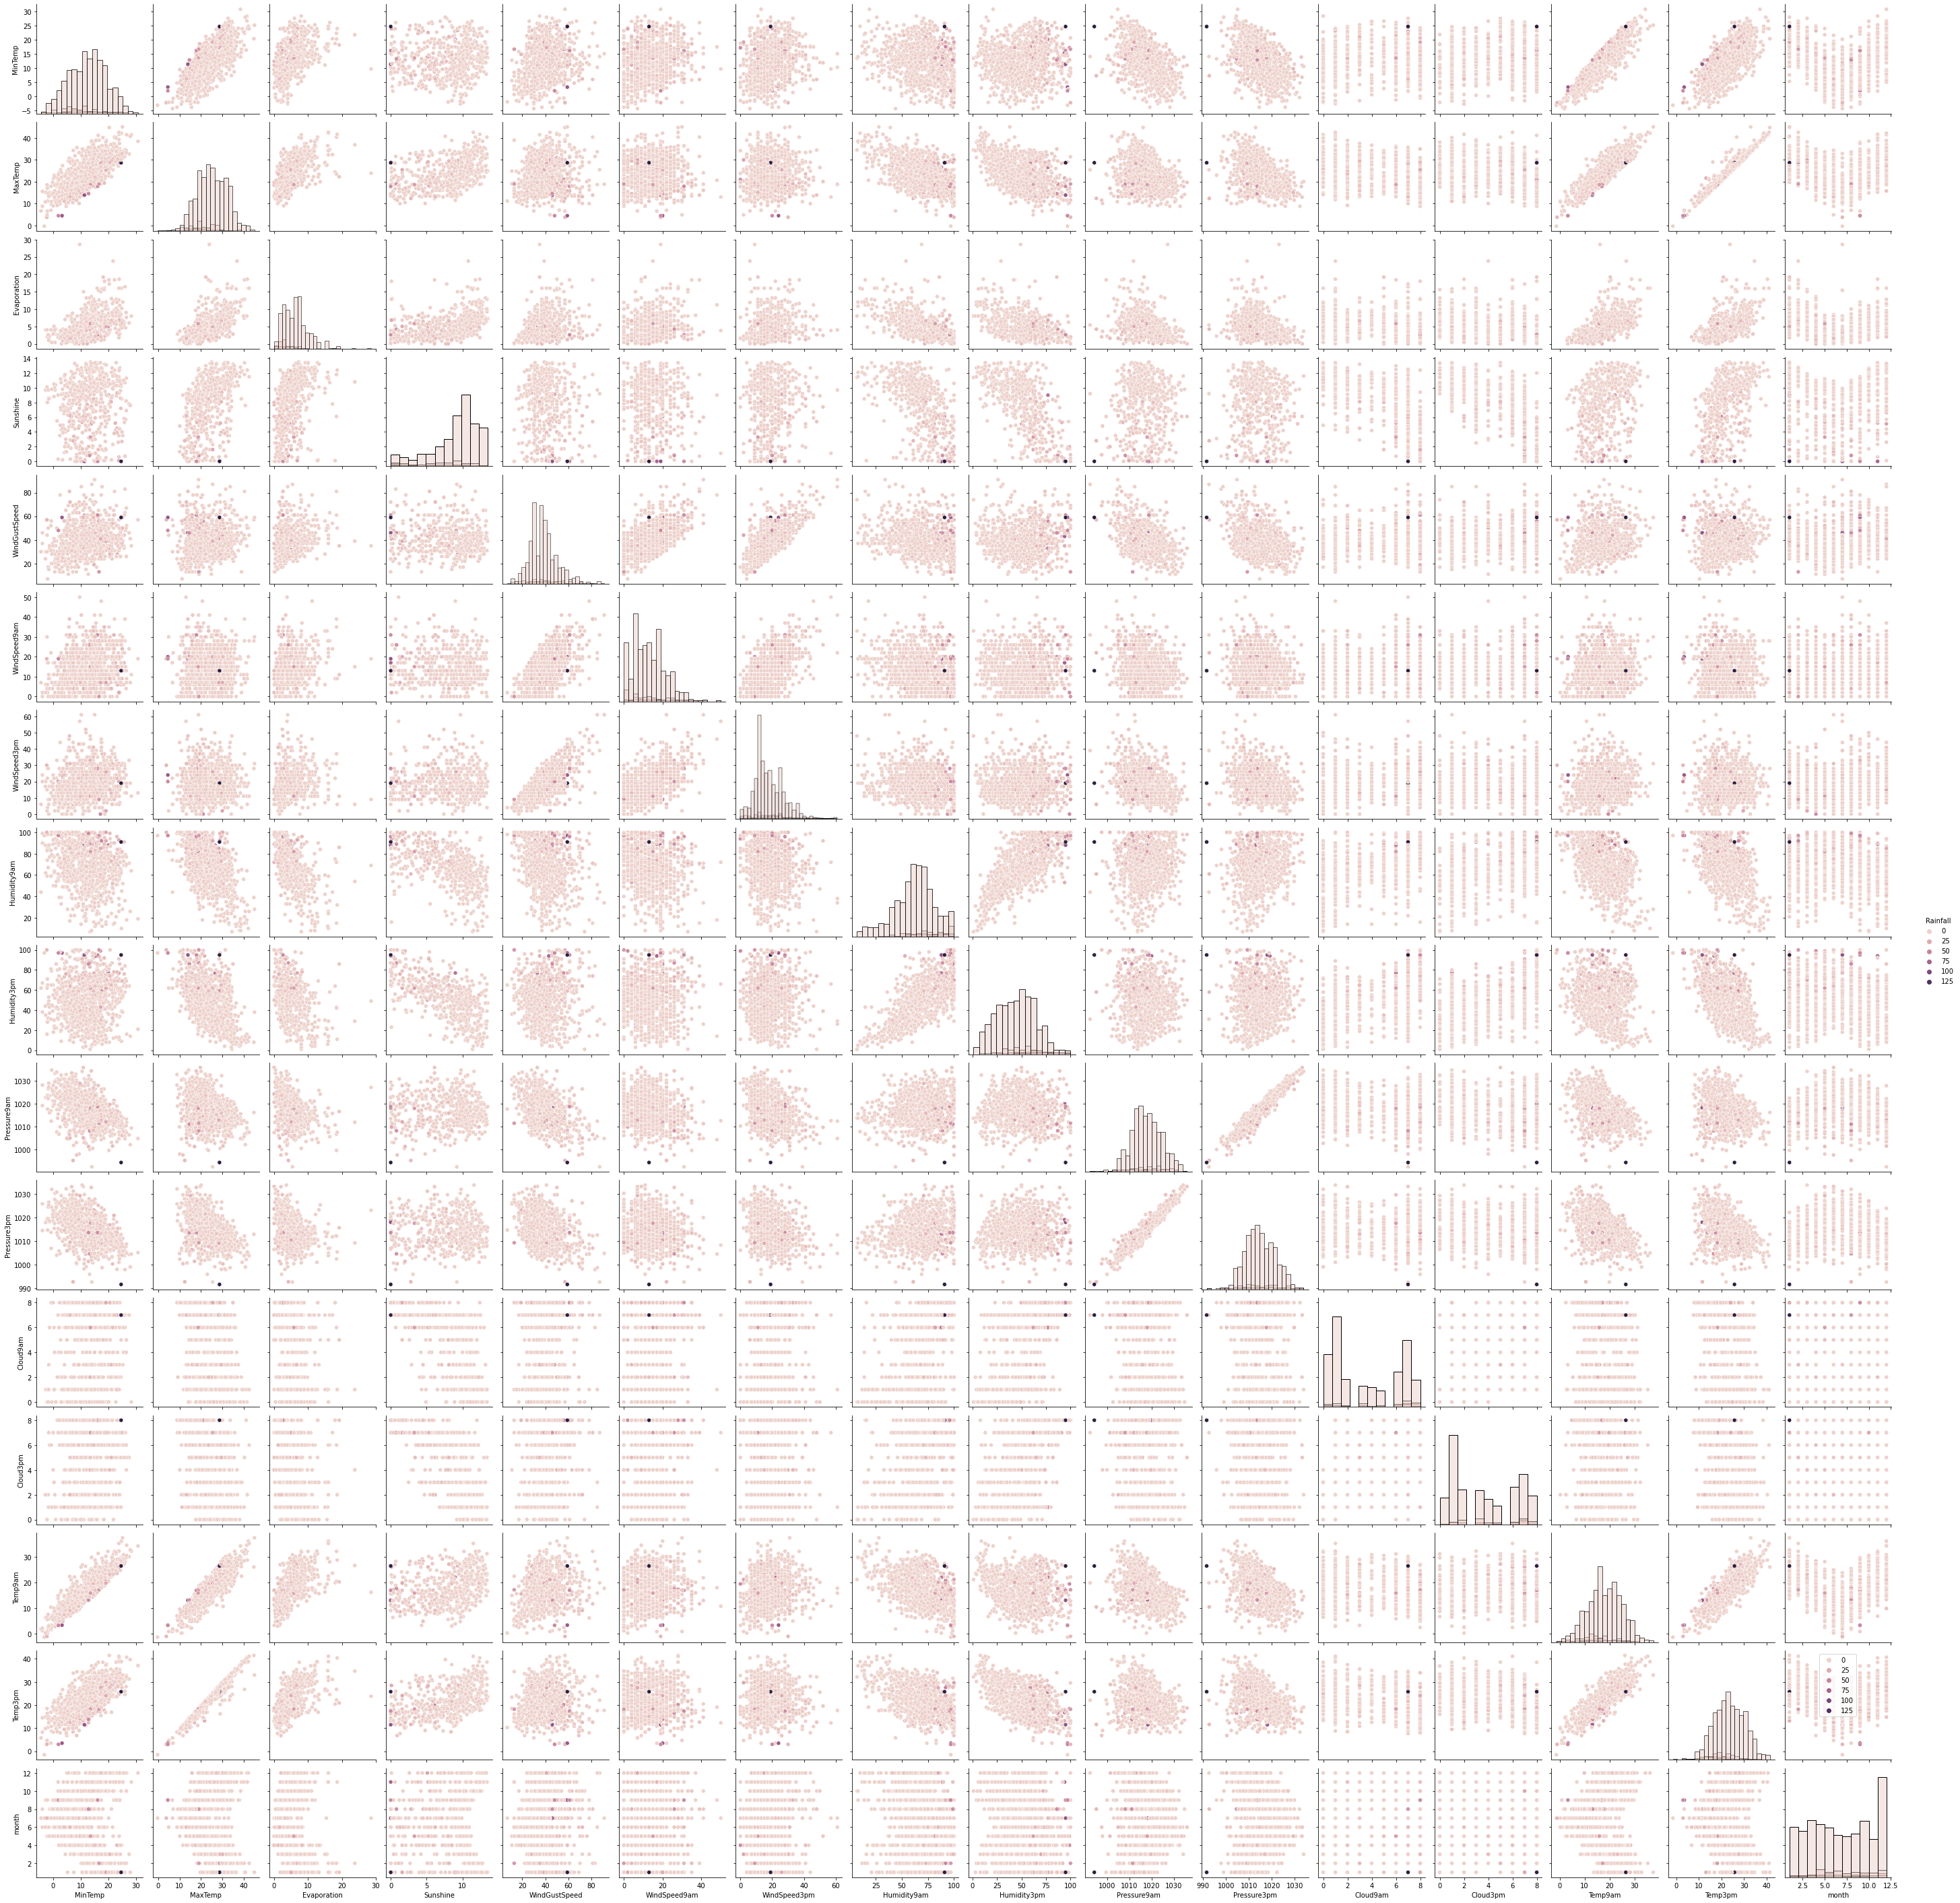

In [44]:
# Построим все возможные диаграммы рассеивания для каждой пары переменных
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Rainfall', diag_kind='hist')
plt.legend()
pass

In [11]:
# Матрица корреляции
corr_mat = data.corr()
corr_mat

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

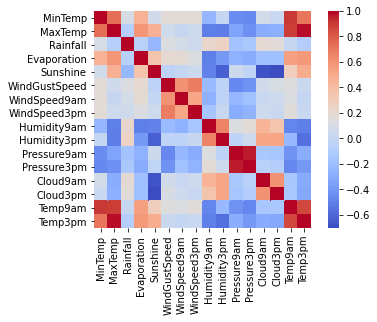

In [12]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видим, что некоторые признаки имеют линейную зависимость (что вполне логично). Например, температура в 3 часа дня/9 утра и минимальная/максимальная температура. Некоторые признаки не имеют вообще никакой зависимости. Например, зависимость температуры и влажности. Рассмотрим график зависимости количества солнечных часов в течение дня и облачности. Должны получить обратную зависимость: чем больше солнечных часов, тем менее облачно должно быть.

In [13]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

MaxTemp        Temp3pm         0.984503
Pressure9am    Pressure3pm     0.961326
MinTemp        Temp9am         0.901821
MaxTemp        Temp9am         0.887210
Temp9am        Temp3pm         0.860591
MinTemp        MaxTemp         0.736555
               Temp3pm         0.708906
WindGustSpeed  WindSpeed3pm    0.686307
Humidity9am    Humidity3pm     0.666949
WindGustSpeed  WindSpeed9am    0.605303
Cloud9am       Cloud3pm        0.603564
MaxTemp        Evaporation     0.587932
Evaporation    Temp3pm         0.572893
               Temp9am         0.545115
Humidity3pm    Cloud3pm        0.523120
WindSpeed9am   WindSpeed3pm    0.519547
Humidity3pm    Cloud9am        0.517120
dtype: float64

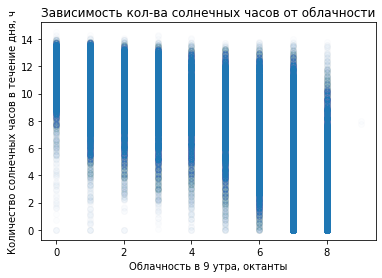

In [14]:
# посмотрим зависимость кол-ва солнечных часов от облачности
plt.plot(data['Cloud9am'], data['Sunshine'], 'o', alpha = 0.01)
plt.xlabel('Облачность в 9 утра, октанты')
plt.ylabel('Количество солнечных часов в течение дня, ч')
plt.title('Зависимость кол-ва солнечных часов от облачности')
pass

В принципе из графика мы видим, что при ясном небе (0 октантов) чаще бывает длинный солнечный день. И наоборот, при сильной облачности наш световой день очень короткий.

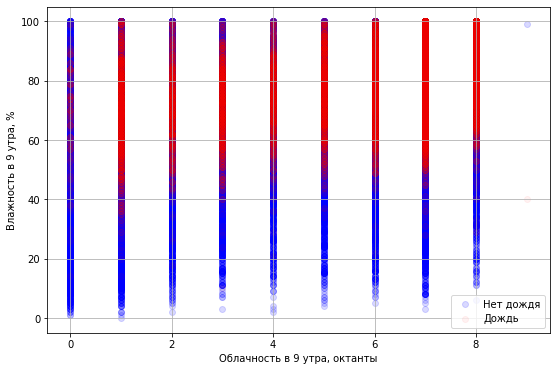

In [15]:
# зависимость наличия дождя от влажности и облачности
plt.figure(figsize = (9, 6))

plt.scatter(data[data['RainToday'] == 'No']['Cloud9am'],
            data[data['RainToday'] == 'No']['Humidity9am'],
            alpha = 0.15,
            label = 'Нет дождя',
            color = 'b')

plt.scatter(data[data['RainToday'] == 'Yes']['Cloud9am'],
            data[data['RainToday'] == 'Yes']['Humidity9am'],
            alpha = 0.05,
            label = 'Дождь',
            color = 'r')

plt.xlabel('Облачность в 9 утра, октанты')
plt.ylabel('Влажность в 9 утра, %')
plt.legend()
plt.grid()

Интерпретация графика: при влажности больше 50% и облачности от 1 октанты будет зафиксирован дождь. И совершенно логичная зависимость: дождь не пойдет в ясную погоду.

Рассмотрим ещё один параметр - "месяц". С помощью него избавимся от категориального признака, заменив его количественным. Категориальный признак "дата" мало применим в обучении модели, т.к. из-за него мы можем получить переобучение нашей модели. Модель должна иметь хорошую обобщающую способность и не зависеть от даты наблюдения. 

In [16]:
data['month'] = pd.DatetimeIndex(data['Date']).month

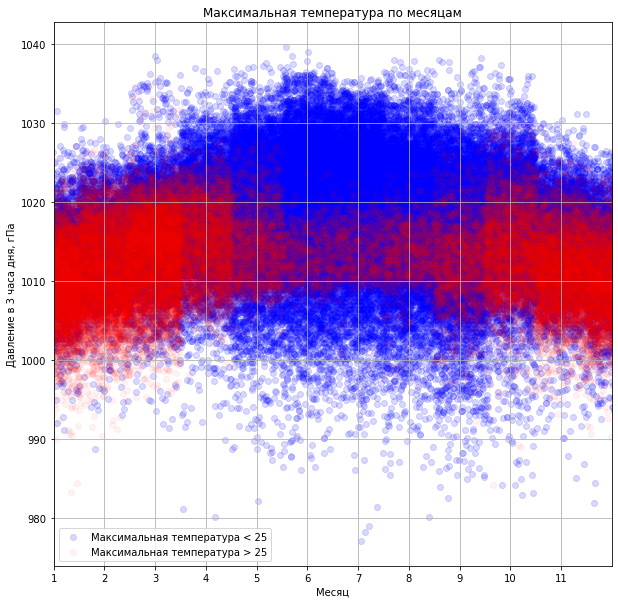

In [17]:
# Проанализируем зависимость атмосферного давления и максимальной температуры по месяцам
np.random.seed(0)
education_num_rnd = data['month'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 10))

plt.scatter(education_num_rnd[data['MaxTemp'] < 25],
            data[data['MaxTemp'] < 25]['Pressure3pm'],
            alpha = 0.15,
            label = 'Максимальная температура < 25',
            color = 'b')

plt.scatter(education_num_rnd[data['MaxTemp'] > 25],
            data[data['MaxTemp'] > 25]['Pressure3pm'],
            alpha = 0.05,
            label = 'Максимальная температура > 25',
            color = 'r')

plt.xlabel('Месяц')
plt.xticks(range(12))
plt.xlim(1, 12)
plt.ylabel('Давление в 3 часа дня, гПа')
plt.title('Максимальная температура по месяцам')
plt.legend()
plt.grid()

Из графика зависимости видим, что зимой атмосферное давление изменяется чаще, чем летом. Летом оно стабильнее и ниже.

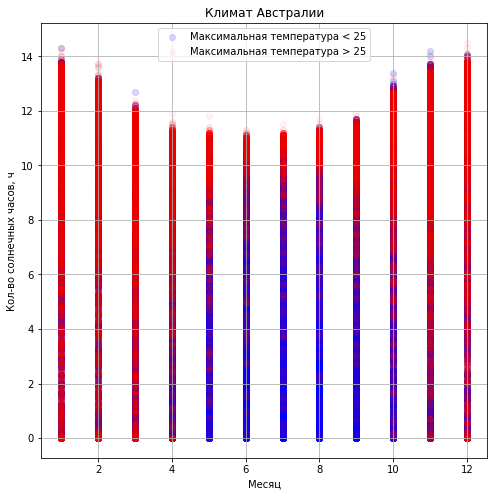

In [18]:
# Посмотрим зависимости температуры и количества солнечных часов по каждому из месяцев
plt.figure(figsize = (8, 8))

plt.scatter(data[data['MaxTemp'] < 25]['month'],
            data[data['MaxTemp'] < 25]['Sunshine'],
            alpha = 0.15,
            label = 'Максимальная температура < 25',
            color = 'b')

plt.scatter(data[data['MaxTemp'] > 25]['month'],
            data[data['MaxTemp'] > 25]['Sunshine'],
            alpha = 0.05,
            label = 'Максимальная температура > 25',
            color = 'r')

plt.xlabel('Месяц')
plt.ylabel('Кол-во солнечных часов, ч')
plt.title('Климат Австралии')
plt.legend()
plt.grid()

Из графика видим, что летом солнечный день дольше, а зимой короче.

In [19]:
# Посмотрим на категориальные и количественные признаки
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month']


In [20]:
for c in categorical_columns:
    print(c, data[c].unique())

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['N

#### 3. Обработать пропущенные значения (или убедиться, что их нет)

In [21]:
# Находим медиану по каждому признаку
data.median(axis = 0)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.4
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
month               6.0
dtype: float64

In [22]:
# Заменяем пропущенные значения (NaN) на медианы
data = data.fillna(data.median(axis = 0), axis = 0)

In [23]:
data[numerical_columns].count(axis = 0)

MinTemp          145460
MaxTemp          145460
Rainfall         145460
Evaporation      145460
Sunshine         145460
WindGustSpeed    145460
WindSpeed9am     145460
WindSpeed3pm     145460
Humidity9am      145460
Humidity3pm      145460
Pressure9am      145460
Pressure3pm      145460
Cloud9am         145460
Cloud3pm         145460
Temp9am          145460
Temp3pm          145460
month            145460
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

Date            145460
Location        145460
WindGustDir     135134
WindDir9am      134894
WindDir3pm      141232
RainToday       142199
RainTomorrow    142193
dtype: int64

In [25]:
data['WindDir9am'].describe()

count     134894
unique        16
top            N
freq       11758
Name: WindDir9am, dtype: object

In [26]:
type(data['WindDir9am'].describe())

pandas.core.series.Series

In [27]:
data['WindDir9am'].describe().top

'N'

In [28]:
data['WindDir3pm'].describe().top

'SE'

In [29]:
data.describe(include = [object])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2015-03-23  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [30]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [31]:
data.describe(include = [object])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      145460     145460     145460    145460   
unique        3436        49          16         16         16         2   
top     2015-03-23  Canberra           W          N         SE        No   
freq            49      3436       20241      22324      15066    113580   

       RainTomorrow  
count        145460  
unique            2  
top              No  
freq         113583

#### 4. Обработать категориальные признаки

Исключим дату:

In [32]:
data.drop(('Date'), axis = 1, inplace = True)

In [33]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


В бинарном признаке RainToday заменим значения "Yes" и "No" на 1 и 0 соответственно

In [34]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count     145460
unique         2
top            0
freq      113580
Name: RainToday, dtype: int64

То же самое действие произведем с целевым признаком RainTomorrow

In [36]:
data.at[data['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
data.at[data['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data['RainTomorrow'].describe()

count     145460
unique         2
top            0
freq      113583
Name: RainTomorrow, dtype: int64

In [37]:
nonbinary_columns = nonbinary_columns[1:]
nonbinary_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

К небинарными признакам применим метод векторизации. Признак, принимающий n значений заменим на n признаков, принимающих значения 0 и 1, в зависимости от того, чему равно значение исходного признака.

In [38]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

#### 5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

Алгоритмы машинного обучения будут работать качественнее, если входные данные будут нормализованы. Отмасштабированные данные можно получить, приведя их к нулевому среднему значению с единичным квадратичным отклонением.

In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.192053      23.215962       2.307990       5.179779   
std         6.365780       7.088358       8.389771       3.178819   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.200000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.989889      39.962189      14.030751      18.669758   
std         2.757790      13.120931       8.861796       8.716716   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.400000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       68.901251      51.553396    1017.644768    1015.250115   
std        18.855360      20.471345       6.728484       6.663994   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.100000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        4.659755       4.709913      16.987101      21.668916   
std         2.281490       2.106768       6.449299       6.850658   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.200000   
max         9.000000       9.000000      40.200000      46.700000   

               month  
count  145460.000000  
mean        6.399615  
std         3.427262  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [42]:
data_numerical.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05   
mean   3.028272e-14 -8.231757e-14 -4.579385e-14 -1.071680e-12 -4.582884e-13   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.250514e+00 -3.952391e+00 -2.750957e-01 -1.629467e+00 -2.897207e+00   
25%   -7.056564e-01 -7.358491e-01 -2.750957e-01 -3.711376e-01  7.618806e-02   
50%   -3.016967e-02 -8.689767e-02 -2.750957e-01 -1.194718e-01  1.487099e-01   
75%    7.238621e-01  7.031302e-01 -2.035800e-01  6.361066e-03  2.574926e-01   
max    3.410100e+00  3.510551e+00  4.394542e+01  4.398496e+01  2.360626e+00   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05   
mean    7.840727e-15  5.293677e-15  4.004012e-16 -7.636306e-15  7.976221e-15   
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    -2.588398e+00 -1.583285e+00 -2.141834e+00 -3.654200e+00 -2.518320e+00   
25%    -6.830452e-01 -7.933776e-01 -6.504466e-01 -6.311866e-01 -7.109155e-01   
50%    -7.333237e-02 -1.163140e-01  3.788606e-02  5.827249e-02  2.181605e-02   
75%     4.601664e-01  5.607497e-01  6.114966e-01  7.477316e-01  6.568500e-01   
max     7.243222e+00  1.308643e+01  7.838990e+00  1.649332e+00  2.366557e+00   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05  1.454600e+05   
mean   1.741436e-11 -4.853791e-12  5.164207e-15 -9.779597e-14  2.623867e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.520525e+00 -5.724812e+00 -2.042418e+00 -2.235611e+00 -3.750345e+00   
25%   -6.160032e-01 -6.227669e-01 -7.274875e-01 -3.369680e-01 -7.267613e-01   
50%   -6.653450e-03 -7.520228e-03  1.491327e-01  1.376927e-01 -4.451661e-02   
75%    6.175585e-01  6.227324e-01  5.874428e-01  6.123535e-01  6.997503e-01   
max    3.471099e+00  3.653947e+00  1.902373e+00  2.036336e+00  3.599290e+00   

            Temp3pm         month  
count  1.454600e+05  1.454600e+05  
mean  -1.630031e-13 -9.715400e-16  
std    1.000000e+00  1.000000e+00  
min   -3.951287e+00 -1.575490e+00  
25%   -7.253195e-01 -9.919333e-01  
50%   -8.304543e-02 -1.165989e-01  
75%    6.614086e-01  7.587355e-01  
max    3.653822e+00  1.634070e+00

In [43]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(145460, 116)


#### 6. Разбить данные на обучающую и тестовую выборки

In [44]:
data

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189756 -0.044575 -0.203580    -0.119472   0.14871       0.307738   
1      -0.752783  0.265793 -0.275096    -0.119472   0.14871       0.307738   
2       0.111211  0.350439 -0.275096    -0.119472   0.14871       0.460166   
3      -0.470022  0.674915 -0.275096    -0.119472   0.14871      -1.216544   
4       0.833825  1.281543 -0.155903    -0.119472   0.14871       0.079096   
...          ...       ...       ...          ...       ...            ...   
145455 -1.475397  0.025963 -0.275096    -0.119472   0.14871      -0.683045   
145456 -1.349725  0.294009 -0.275096    -0.119472   0.14871      -1.368972   
145457 -1.066963  0.519731 -0.275096    -0.119472   0.14871      -0.225761   
145458 -0.689947  0.533838 -0.275096    -0.119472   0.14871      -0.911687   
145459  0.425391 -0.086898 -0.275096    -0.119472   0.14871      -0.073332   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.673594      0.611497     0.111308    -1.443647  ...   
1          -1.131909      0.382052    -1.320646    -1.297101  ...   
2           0.560750      0.840941    -1.638858    -1.052857  ...   
3          -0.342002     -1.109335    -1.267610    -1.736740  ...   
4          -0.793378      0.152608     0.694696    -0.906311  ...   
...              ...           ...          ...          ...  ...   
145455     -0.116314     -0.879891    -0.949399    -1.345949  ...   
145456     -0.116314     -1.109335    -0.684222    -1.492496  ...   
145457     -0.567690     -1.109335    -0.843328    -1.345949  ...   
145458     -0.116314     -1.338779    -0.949399    -1.345949  ...   
145459      0.335062     -0.191558    -0.366010    -0.759764  ...   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0                  0              0               0               0   
1                  0              0               0               0   
2                  0              0               0               0   
3                  0              0               0               0   
4                  0              0               0               0   
...              ...            ...             ...             ...   
145455             0              0               0               0   
145456             0              0               0               0   
145457             0              0               0               0   
145458             0              0               0               0   
145459             0              0               0               0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0                   0             0               1               0   
1                   0             0               0               1   
2                   0             0               0               1   
3                   0             0               0               0   
4                   0             0               0               0   
...               ...           ...             ...             ...   
145455              0             0               0               0   
145456              0             0               0               0   
145457              0             0               1               0   
145458              0             0               0               0   
145459              0             0               0               0   

        RainToday  RainTomorrow  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
145455          0             0  
145456          0             0  
145457          0             0  
145458          0             0  
145459          0             0  

[145460 rows x 116 columns]

In [45]:
X = data.drop(('RainTomorrow'), axis = 1) # выбрасываем столбец RainTomorow (это столбец y, верные ответы)
y = data['RainTomorrow']
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=115)

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(145460, 115)
(145460,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  101822 и 43638


#### 7. Запустить классификатор ближайших соседей (попробовать разное их количество)

In [176]:
num_neigh = [5, 10, 20]
y_train_predict = []
y_test_predict = []
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors = num_neigh[i])
    knn.fit(X_train, list(y_train))
    y_train_predict.append(knn.predict(X_train))
    y_test_predict.append(knn.predict(X_test))

#### 8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

In [177]:
err_train = []
err_test = []
for i in range(3):
    err_train.append(np.mean(y_train != y_train_predict[i]))
    err_test.append(np.mean(y_test  != y_test_predict[i]))
    print('При k = ' + str(num_neigh[i]) + ' ошибка на тренировочном и тестовом наборе = ' \
          + str(err_train[i]) + ' и ' + str(err_test[i]))

При k = 5 ошибка на тренировочном и тестовом наборе = 0.1189330400109996 и 0.16208350520188827
При k = 10 ошибка на тренировочном и тестовом наборе = 0.13712164365264873 и 0.1562170585269719
При k = 20 ошибка на тренировочном и тестовом наборе = 0.14341694329319793 и 0.15461295201429948


In [178]:
# Матрица ошибок для Knn с k = 20
print(confusion_matrix(list(y_test), y_test_predict[2]))

[[32911  1076]
 [ 5671  3980]]


#### 9. Сделать общие выводы

Видим, что с увеличением k ошибка на тестовом наборе уменьшается, а на тренировочном увеличивается. Возможно это связано с тем, что в обучающем наборе данных больше, а значит правильно их классифицировать при такой густоте алгоритму сложнее. На тестовом же это сделать легче.

## Лабораторная работа №2

Обучить на данных полносвязную (неглубокую) нейронную сеть. Попробовать 1-2 скрытых слоя. Построить графики зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha и от количества нейронов. Наблюдается ли переобучение/недообучение? По желанию: использовать torch и сверточные сети. Сделайть выводы.

#### 1. Разбиваем данные на обучающую и тестовую выборки

In [52]:
X = X.to_numpy()
y = np.array(y != 0, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
N_test, _ = X_test.shape

#### 2. Обучаем классификатор

In [139]:
from sklearn.neural_network import MLPClassifier

Попробуем использовать один слой и попробуем подобрать наилучшее количество нейронов

In [140]:
hidden_layer = np.arange(1, 25, 5)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

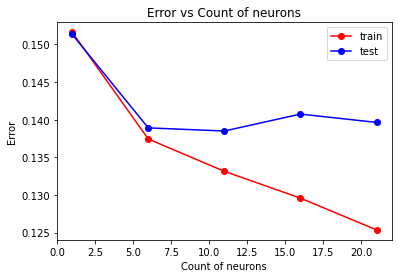

In [141]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs Count of neurons')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

Минимальное значение ошибки:

In [142]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1253463030228406 0.13849422940710804


Оптимальное число нейронов в скрытом слое:

In [143]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[11]


Добавим второй слой и проделаем все то же самое, но при этом, на втором слое будем работать с одним нейороном, а вот на первом подберем оптимальное количество. 

In [144]:
hidden_layer = np.arange(1, 25, 5)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, 11, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

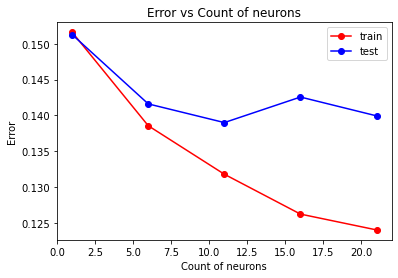

In [145]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs Count of neurons')
plt.xlabel('Count of neurons')
plt.ylabel('Error')
plt.legend()
pass

Минимальное значение ошибки:

In [146]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.1240226559133165 0.13899420857464273


Оптимальное число нейронов на втором скрытом слое:

In [147]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[11]


#### 3. Подбор гипер-параметров

Используя полученные значения, попробуем подобрать оптимальное значение параметра `alpha`, так же небольшим перебором. Итак, используем два нейронных слоя, с 1 нейроном и на первом и на втором слое.

In [150]:
from sklearn.metrics import accuracy_score
alpha_arr = np.arange(0.0001, 0.01, 0.001)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (11, 11), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=10000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

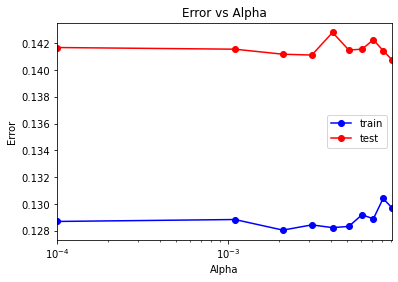

In [151]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()

Рассмотрим как менялась метрика в зависимости от гиперпараметра:

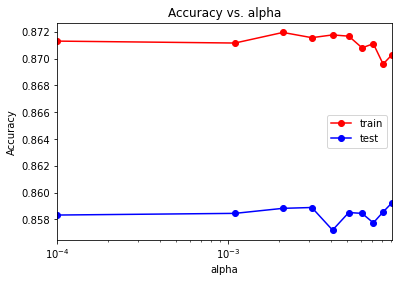

In [152]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [153]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.12805516222372715 0.140785800591642


Оптимальное значение `alpha`:

In [154]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.0091]


In [155]:
alpha_opt = alpha_opt[0]

#### 4. Классификатор при найденном оптимальном значении `alpha`

Повторим обучение:

In [156]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred  = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test  != y_test_pred))

/Users/dmitrijkaganov/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.1353506125715693
0.14036915128536312


Матрица рассогласования:

In [158]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[35454  4825]
 [ 1913  5810]]


Другие метрики качества:

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37367
           1       0.75      0.55      0.63     10635

    accuracy                           0.86     48002
   macro avg       0.82      0.75      0.77     48002
weighted avg       0.85      0.86      0.85     48002



#### 5. Вывод

Таким образом была построенна полносвязная нейронная сеть. Получено оптимальное значение параметра `alpha` = 0.0091, а ошибка при этом составила 0.140785800591642. На основе полученного значения был построен ещё один классификатор и собраны метрики.
Более точного прогноза можно добиться при более качественном подборе количества нейронов и параметра альфа, но быстрое наступление переобучения может говорить, что не стоит увеличивать количество нейронов, а подбирать более плотную сетку для исследования.

## Запуск других классификаторов и сравнение результатов

### SVC - Машина опорных векторов

In [55]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [57]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.1461347452235835 0.14857714261905755


### Random Forest - Случайный лес

In [58]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

6.156498183833036e-05 0.14403566518061747


### Extremely Randomized Trees

In [59]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

6.156498183833036e-05 0.1471397025123953


### AdaBoost

In [60]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.14785856471505673 0.15088954626890547


### Вывод

На данных "Дожди в Австралии" были применены несколько алгоритмов машинного обучения из библиотеки scikit-learn. KNN, SVC, RF, ExtrRF, AdaBoost которые показали следующие результаты на тестовой выборке: 
* KNN - 0.15461295201429948
* SVC - 0.14857714261905755
* RF  - 0.14403566518061747
* ExtrRF   - 0.1471397025123953
* AdaBoost - 0.15088954626890547

Можно отметить, что при использовании KNN, был проведен подбор наиболее оптимального числа соседей, а при использовании других методов аналогичные процедуры не проводились. Это связано долгой по времени работой методов и подборов параметров для больших датасетов (как наш), из-за чего последнее действие опускается. Лучше всего себя показал - Случайный лес.

## Борьба с несбалансированностью классов

В нашем случае распределение целевой переменной имеет следующий вид: 76% - нет; 22% - да. Это уже можно назвать несбелансированностью классов и с ней можно попробовть как-то бороться. Для этого мы будем использовать алгоритм SMOTE

In [53]:
print(data.shape)

(145460, 116)


In [54]:
data['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [55]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (101822, 115)
Number transactions y_train dataset:  (101822,)
Number transactions X_test dataset:  (43638, 115)
Number transactions y_test dataset:  (43638,)


In [65]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# импорт модуля SMOTE из библиотеки imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 22226
Before OverSampling, counts of label '0': 79596 

After OverSampling, the shape of train_X: (159192, 112)
After OverSampling, the shape of train_y: (159192,) 

After OverSampling, counts of label '1': 79596
After OverSampling, counts of label '0': 79596


In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=10)

In [67]:
y_test_predict_res = knn.predict(X_test)
err_test_res  = np.mean(y_test  != y_test_predict_res)
err_test_res

0.23947018653467161

### Вывод

В полученном результате ошибка значительно увеличилась в сравнении с основной моделью.

## Исключение коррелированных переменных

In [57]:
X = data.drop(['RainTomorrow', 'MaxTemp', 'Pressure9am', 'MinTemp'], axis = 1)
y = data['RainTomorrow']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

In [58]:
feature_names

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=112)

In [59]:
X = X.to_numpy()
y = np.array(y != 0, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print(X.shape)
print(y.shape)
N, d = X.shape

(145460, 112)
(145460,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

101822 43638


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.1585544708740089

In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[32883  1104]
 [ 5815  3836]]


### Вывод

В полученном результате ошибка незначительно увеличилась в сравнении с основной моделью. Также заметны небольшие изменение в матрице ошибок - ложно-положительных результатов стало меньше. Переменные для удаления были выбраны случайно, что объясняет ухудшение конечного результата. Для его улучшения можно исключить переменные, которые лучше корелируют с результатом или попробовать подобрать оптимальное число соседей.

## Общий вывод

Было проведено сравнение разных классификаторов, а так же получено более оптимальное минимальное значение ошибки, при помощи метода Случайный лес. Была проведена "борьба" с несбалансированностью и исключением коррелированных переменных, но это не привело к улучшению результатов. Исключение коррелированных переменных дало лишь небольшое преимущество при использовании метода k-ближайших соседей. Таким образом мы познакомились с разными подходами и методами улучшения минимального значения ошибки.